In [1]:
import os
os.chdir('C:\\Users\\arif\\OneDrive - Higher Education Commission\\HI Research\\pyimagesearch')
from timeseires.CNN1D.GoogLeNet1D import PC
from timeseires.utils.to_split import to_split
#from timeseires.callbacks.EpochCheckpoint import EpochCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint
from timeseires.callbacks.TrainingMonitor import TrainingMonitor
from timeseires.utils.load_only_multi_step import load_only_multi_step
from timeseires.utils.multivariate_multi_step import multivariate_multi_step
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD  
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv1D,TimeDistributed, Bidirectional
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,MaxPooling1D,Concatenate,AveragePooling1D, GlobalMaxPooling1D, Input
from tensorflow.keras.models import Sequential,Model
import pandas as pd
import time, pickle
import pydot
import numpy as np
import tensorflow.keras.backend as K
import tensorflow
from tensorflow.keras.layers import Input, Reshape, Dense, Lambda
from tensorflow.keras.layers import Layer, Flatten, LeakyReLU, concatenate
from tensorflow.keras.regularizers import l2


In [2]:
path_tr = 'C:\\Users\\arif\\OneDrive - Higher Education Commission\\HI Research\\Datasets\\AEP\\AEP_train.csv'
df_tr = pd.read_csv(path_tr)
train_set = df_tr.iloc[:].values 

path_v = 'C:\\Users\\arif\\OneDrive - Higher Education Commission\\HI Research\\Datasets\\AEP\\AEP_validation.csv'
df_v = pd.read_csv(path_v)
validation_set = df_v.iloc[:].values 

path_te = 'C:\\Users\\arif\\OneDrive - Higher Education Commission\\HI Research\\Datasets\\AEP\\AEP_test.csv'
df_te = pd.read_csv(path_te)
test_set = df_te.iloc[:].values 
#.......................................................................................................
scaler = pickle.load(open("C:\\Users\\arif\\OneDrive - Higher Education Commission\\HI Research\\Datasets\\AEP\\AEP_scaler.pkl", 'rb'))
df_te.shape,df_v.shape

((12130, 21), (24259, 21))

In [3]:
time_steps=24
num_features=21

In [13]:
def _10a(time_steps,num_features):
    inputs = Input(shape=(time_steps,num_features))

    cnn    = Conv1D(64, 2,activation='relu')(inputs)
    cnn    = MaxPooling1D(2)(cnn)
    cnn    = Conv1D(32, 2,activation='relu')(cnn)
    flatc    = Flatten()(cnn)

    lstm   = LSTM(48 , activation='relu')(inputs)
    flatl   = Flatten()(lstm)

    merge  = concatenate([flatl , flatc])
    #merge = Concatenate(axis=-1)([flatl, flatc])
    # para = tensorflow.expand_dims(merge,-1)
    para = tensorflow.keras.layers.Reshape((1,merge.shape[1]))(merge)

    lstm2  = LSTM(300 , activation='relu')(para)

    dens1  = Dense(200, activation='relu')(lstm2)
    dens2  = Dropout(0.3)(dens1)

    dens3  = Dense(200, activation='sigmoid')(dens2)
    dens4  = Dense(24, activation='sigmoid')(dens3)

    model = Model(inputs=inputs, outputs=dens4)
    return model

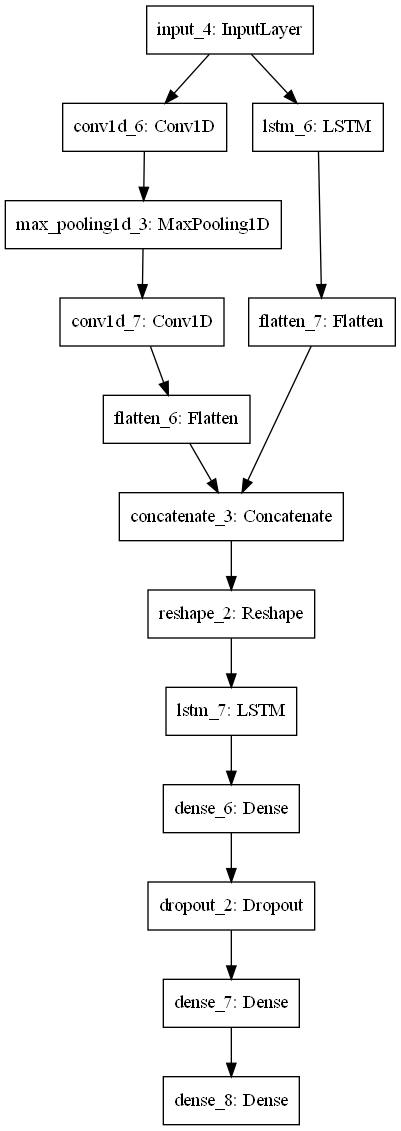

In [14]:
model = _10a(24, 21)
tensorflow.keras.utils.plot_model(model)

In [15]:
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 24, 21)]     0                                            
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 23, 64)       2752        input_4[0][0]                    
__________________________________________________________________________________________________
max_pooling1d_3 (MaxPooling1D)  (None, 11, 64)       0           conv1d_6[0][0]                   
__________________________________________________________________________________________________
lstm_6 (LSTM)                   (None, 48)           13440       input_4[0][0]                    
_______________________________________________________________________________________